In [118]:
#drafting the coordinate match module
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from astropy import units as u
from astropy.coordinates import SkyCoord
import csv 
import pandas as pd
from astropy.coordinates import match_coordinates_sky
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [63]:
# PART 1

In [64]:
#Preparing sample 1
def load_and_prepare1(filename):
    # Step 1: importing the dataset
    df = pd.read_csv(filename)
    
    # Step 2: pulling and prearing the ra & dec columns
    RA = df["RA"]
    DEC = df["DEC"]
    data_rsgRADEC = pd.concat([RA,DEC], axis=1)
    
    #Step 3: Getting RA & DEC into degrees
    rsg_coord = data_rsgRADEC.values.tolist()
    c1 = SkyCoord(rsg_coord, frame='icrs', unit= (u.hourangle, u.deg))
    
    return c1

    #Preparing sample 2
    def load_and_prepare2(filename2):
        df2 = pd.read_csv(filename2)
    
        RAstar = df2["RA_star"]
        DECstar = df2["DEC_star"]
        data2_rsgRADEC = pd.concat([RAstar,DECstar], axis=1)
    
        rsg2_coord = data2_rsgRADEC.values.tolist()
        c2 = SkyCoord(rsg2_coord, frame='icrs', unit= (u.hourangle, u.deg))
    
        return c2
    
        def match(c1, c2):
            max_sep = 2.0 * u.arcsec
            idx, d2d, d3d = c2.match_to_catalog_sky(c1)
            sep_constraint = d2d < max_sep
    
            c2_matches = c2[sep_constraint]
            c1_matches = c1[idx[sep_constraint]]

            idx_matches = idx[sep_constraint]
            RSG_match = df.iloc[idx_matches]
        
            return RSG_match

In [159]:
#c1 = load_and_prepare1('RSG1.csv')
#c2 = load_and_prepare2('RSGpaper1.csv')
#match(c1,c2)

In [66]:
#RA = df["RA"]
#DEC = df["DEC"]
#data_rsgRADEC = pd.concat([RA,DEC], axis=1)
    

#df2 = pd.read_csv('RSGpaper1.csv')
#RAstar = df2["RA"]
#DECstar = df2["DEC"]
#data2_rsgRADEC = pd.concat([RAstar,DECstar], axis=1)
    

#rsg_coord = data_rsgRADEC.values.tolist()
#c1 = SkyCoord(rsg_coord, frame='icrs', unit= (u.hourangle, u.deg))
    
#rsg2_coord = data2_rsgRADEC.values.tolist()
#c2 = SkyCoord(rsg2_coord, frame='icrs', unit= (u.hourangle, u.deg))

#max_sep = 2.0 * u.arcsec
#idx, d2d, d3d = c2.match_to_catalog_sky(c1)
#sep_constraint = d2d < max_sep
    
#c2_matches = c2[sep_constraint]
#c1_matches = c1[idx[sep_constraint]]
#idx_matches = idx[sep_constraint]
#RSG_match = df.iloc[idx_matches]

#def match():
#        max_sep = 2.0 * u.arcsec
#        idx, d2d, d3d = c2.match_to_catalog_sky(c1)
#        sep_constraint = d2d < max_sep
    
#        c2_matches = c2[sep_constraint]
#        c1_matches = c1[idx[sep_constraint]]

#       idx_matches = idx[sep_constraint]
#        RSG_match = df.iloc[idx_matches]
        
#        return RSG_match

In [67]:
df = pd.read_csv('RSG1.csv')
RA = df["RA"]
DEC = df["DEC"]
data_rsgRADEC = pd.concat([RA,DEC], axis=1)

df2 = pd.read_csv('RSGpaper1.csv')
RAstar = df2["RA"]
DECstar = df2["DEC"]
data2_rsgRADEC = pd.concat([RAstar,DECstar], axis=1)
    
rsg_coord = data_rsgRADEC.values.tolist()
c1 = SkyCoord(rsg_coord, frame='icrs', unit= (u.hourangle, u.deg))
    
rsg2_coord = data2_rsgRADEC.values.tolist()
c2 = SkyCoord(rsg2_coord, frame='icrs', unit= (u.hourangle, u.deg))
    
max_sep = 2.0 * u.arcsec
idx, d2d, d3d = c2.match_to_catalog_sky(c1)
sep_constraint = d2d < max_sep
    
c2_matches = c2[sep_constraint]
c1_matches = c1[idx[sep_constraint]]

idx_matches = idx[sep_constraint]
RSG_match = df.iloc[idx_matches]

angle_sep = d2d[sep_constraint]
angle_sep_df = DataFrame(angle_sep, columns=['Sep'])
data_match = RSG_match.join(angle_sep_df.set_index(data_match.index), on=data_match.index)

#distance = d3d[sep_constraint]
#data_match = pd.concat([RSG_match,angle_sep_df], axis=1)


        
#return RSG_match
#return data_match

In [68]:
# Adding the sep and distance columns
#angle_sep = [d2d[sep_constraint]]
#x = pd.Series(angle_sep)
#angle_sep_df = DataFrame(angle_sep, columns=['Sep'])
#angle_sep_df = angle_sep_df.to_string(index=False)

In [69]:
#df1=pd.DataFrame([eid[1]], columns=['email'])
#df.append(df1, ignore_index=True)
#df.join(other.set_index('key'), on='key')
#angle_sep_df

In [70]:
angle_sep = d2d[sep_constraint]
angle_sep_df = DataFrame(angle_sep, columns=['Sep'])
#data_match = RSG_match.join(angle_sep_df.set_index('Key'), on='Key')
#data_match = RSG_match.join(angle_sep_df, on='Key')

#data_match = RSG_match.join(angle_sep_df, on=data_match.index)
#data_match

In [71]:
#data_match = RSG_match.join(angle_sep_df.set_index(data_match.index), on=data_match.index)
data_match = RSG_match.join(angle_sep_df.set_index(RSG_match.index), on=RSG_match.index)

In [72]:
data_match

,Key,RA,DEC,K,Kerr,J-K,J-Kerr,#obs,class,pmRA,pmDEC,parallax,errpmRA,errpmDec,errparallax,Sep
380,0,19:44:46,-14:52:21.6,12.839,0.032,1.157,0.046,0,0,-0.196,-0.060,-0.042,0.162,0.146,0.0858,0.000111
79,0,19:44:48,-14:52:15.8,14.454,0.006,1.107,0.010,2,-2,0.094,-0.142,-0.083,0.351,0.312,0.2004,0.000111
82,0,19:44:48,-14:50:52.9,13.287,0.003,1.112,0.005,2,-2,-0.478,0.099,0.035,0.198,0.171,0.1137,0.000111
375,0,19:44:50,-14:44:10.3,14.174,0.071,0.992,0.087,0,0,-0.222,0.304,0.085,0.285,0.239,0.1635,0.000083
103,0,19:44:53,-14:45:40.4,14.972,0.008,1.011,0.013,2,-2,0.011,0.211,-0.135,0.480,0.418,0.2653,0.000083
367,0,19:44:53,-14:45:52.8,14.075,0.078,1.079,0.098,0,0,0.059,-0.329,-0.230,0.235,0.210,0.1282,0.000056
118,0,19:44:54,-14:44:24.7,13.743,0.004,0.980,0.006,2,-2,0.046,0.224,-0.170,0.201,0.178,0.1138,0.000111
111,0,19:44:54,-14:48:06.5,13.329,0.003,1.131,0.005,2,-2,-0.437,0.036,-0.101,0.210,0.182,0.1145,0.000083
133,0,19:44:57,-14:49:20.5,12.514,0.002,1.038,0.004,2,-2,-0.133,0.033,-0.099,0.135,0.114,0.0782,0.000083
157,0,19:45:04,-14:43:37.8,14.932,0.009,0.978,0.013,2,-2,-0.367,0.710,-0.153,0.422,0.356,0.2379,0.000056


In [73]:
#data_match = pd.concat([RSG_match,angle_sep_df], axis=1)
#data_match

In [74]:
angle_sep = d2d[sep_constraint]
angle_sep_df = DataFrame(angle_sep, columns=['Sep'])
data_match = RSG_match.join(angle_sep_df.set_index(data_match.index), on=data_match.index)

In [75]:
distance = d3d[sep_constraint]
distance_df = DataFrame(distance, columns=['distance'])
final_match = data_match.join(distance_df.set_index(RSG_match.index), on=RSG_match.index)

In [76]:
matched = final_match

In [77]:
# PART TWO

In [78]:
df = pd.read_csv('RSG1.csv')

In [79]:
#Sample 1 (df) datasets HRD values
R =  0.50
reddening = 0.25
distance_modulus = 5*np.log10(R * (10**6))-5

K = df["K"]
JK = df["J-K"]

JK_bb = (JK + 0.11) / 0.972
K_bb = K + 0.044

JK_bb0 = (JK_bb) - 0.54* reddening
K_bb0 = (K_bb) - 0.367*reddening
M_K = K_bb0 - distance_modulus

temp = 5643.5 - (1807.1 * (JK_bb0))
BC_K = 5.567 - (7.5686 * (10**(-4))) * temp
M_bol = BC_K + M_K
luminosity = (M_bol - 4.75) / -2.5

T = np.log10(temp)
L = luminosity

In [80]:
#matching datasets HRD values
K_match = matched["K"]
JK_match = matched["J-K"]

JK_bb_match = (JK_match + 0.11) / 0.972
K_bb_match = K_match + 0.044

JK_bb0_match = (JK_bb_match) - 0.54* reddening
K_bb0_match = (K_bb_match) - 0.367*reddening
M_K_match = K_bb0_match - distance_modulus

temp_match = 5643.5 - (1807.1 * (JK_bb0_match))
BC_K_match = 5.567 - (7.5686 * (10**(-4))) * temp_match
M_bol_match = BC_K_match + M_K_match
luminosity_match = (M_bol_match - 4.75) / -2.5

T_match = np.log10(temp_match)
L_match = luminosity_match

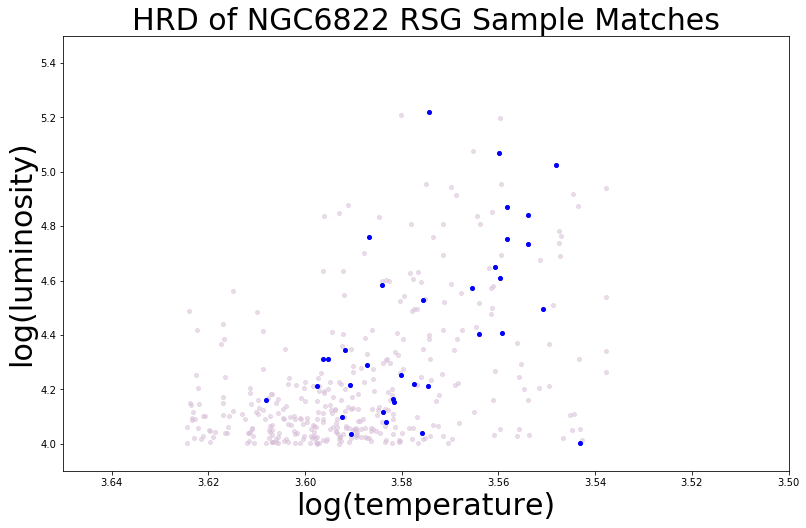

In [104]:
#making the plot
fig, ax = plt.subplots(1,1)       
fig.set_size_inches(13,8)
ax.set_xlim(3.5,3.65)
ax.set_ylim(3.9,5.5)
ax.invert_xaxis()
ax.set_xlabel("log(temperature)", fontsize=30)
ax.set_ylabel("log(luminosity)", fontsize=30)
plt.title('HRD of NGC6822 RSG Sample Matches', fontsize=30)

ax.plot(T, L,color="thistle",marker="o",linestyle="None",markersize=4, alpha=0.5);
ax.plot(T_match,L_match,color="blue",marker="o",linestyle="None",markersize=4);

In [ ]:
interact(makeplot, g = fixed(g),gr = fixed(gr), gridsize=(50, 300, 1));   

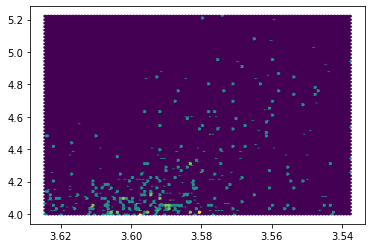

In [93]:
matplotlib.pyplot.hexbin(T, L,C=None, gridsize = 100,bins='log')
#matplotlib.pyplot.hexbin(T_match,L_match, gridsize = 100,bins='log')
plt.gca().invert_xaxis()

"""Hess Diagram Default Function"""
def makeplot(g, gr, gridsize):
    import matplotlib
    import numpy as np
    import matplotlib.pyplot as plt
    from ipywidgets import interact
    matplotlib.pyplot.hexbin(gr, g,C=None, gridsize = gridsize,bins='log')
    plt.gca().invert_yaxis()
    plt.xlabel('g - r')
    plt.ylabel('g')
plt.title('Hex Diagram with Fixed Gridsize 100')
makeplot(g,gr, gridsize=100) 

"""Final Interactive Hess Diagram Function"""
def interactive_hess(g, gr):
    interact(makeplot, g = fixed(g),gr = fixed(gr), gridsize=(50, 300, 1));   


In [153]:
def hrd(filename, matches, pointsize,pointsize2):
    #matching datasets HRD values
    data = pd.read_csv(filename)
    R =  0.50
    reddening = 0.25
    distance_modulus = 5*np.log10(R * (10**6))-5
    K = data["K"]
    JK = data["J-K"]
    JK_bb = (JK + 0.11) / 0.972
    K_bb = K + 0.044
    JK_bb0 = (JK_bb) - 0.54* reddening
    K_bb0 = (K_bb) - 0.367*reddening
    M_K = K_bb0 - distance_modulus
    temp = 5643.5 - (1807.1 * (JK_bb0))
    BC_K = 5.567 - (7.5686 * (10**(-4))) * temp
    M_bol = BC_K + M_K
    luminosity = (M_bol - 4.75) / -2.5
    T = np.log10(temp)
    L = luminosity
    
    #matching datasets HRD values
    K_match = matches["K"]
    JK_match = matches["J-K"]
    JK_bb_match = (JK_match + 0.11) / 0.972
    K_bb_match = K_match + 0.044
    JK_bb0_match = (JK_bb_match) - 0.54* reddening
    K_bb0_match = (K_bb_match) - 0.367*reddening
    M_K_match = K_bb0_match - distance_modulus
    temp_match = 5643.5 - (1807.1 * (JK_bb0_match))
    BC_K_match = 5.567 - (7.5686 * (10**(-4))) * temp_match
    M_bol_match = BC_K_match + M_K_match
    luminosity_match = (M_bol_match - 4.75) / -2.5
    T_match = np.log10(temp_match)
    L_match = luminosity_match
    
    #making the plot
    fig, ax = plt.subplots(1,1)       
    fig.set_size_inches(13,8)
    ax.set_xlim(3.5,3.65)
    ax.set_ylim(3.9,5.5)
    ax.invert_xaxis()
    ax.set_xlabel("log(temperature)", fontsize=30)
    ax.set_ylabel("log(luminosity)", fontsize=30)
    plt.title('HRD of NGC6822 RSG Sample Matches', fontsize=30)

    ax.plot(T, L,color= "pink", marker="o",linestyle="None",markersize=pointsize, alpha=0.5);
    ax.plot(T_match,L_match,color="blue",marker="o",linestyle="None",markersize=pointsize2);

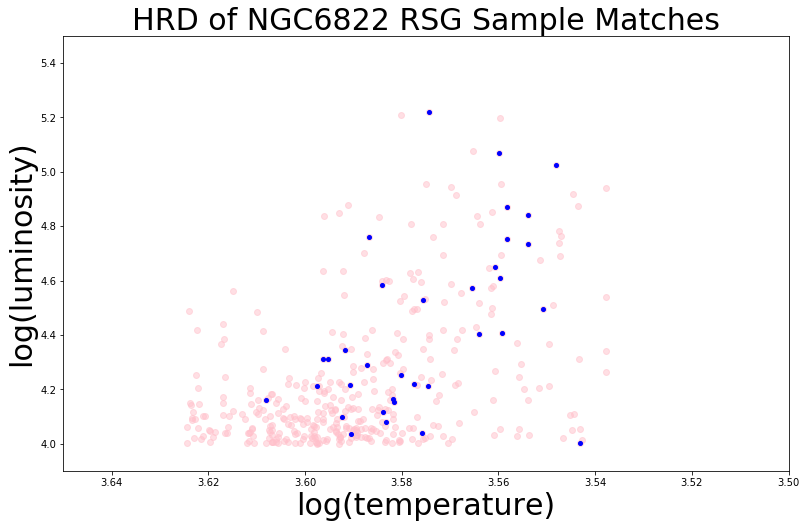

In [155]:
hrd('RSG1.csv', matched, 6 ,4)

In [156]:
#interact widget

def interactive_hrd(filename, matches, pointsize, pointsize2):
    interact(hrd, filename = fixed(filename),matches = fixed(matches), pointsize=(0, 10, 1),pointsize2=(0, 10, 1));   

In [158]:
interactive_hrd('RSG1.csv', matched, 6, 4)

interactive(children=(IntSlider(value=5, description='pointsize', max=10), IntSlider(value=5, description='poi…